# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=" + "Metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | lionel town
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | isabela
Processing Record 5 of Set 1 | matoury
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | coruripe
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | broken hill
Processing Record 15 of Set 1 | griffith
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | bamboo flat
Processing Record 19 of Set 1 | north battleford
Processing Record 20 of Set 1 | kimbe
Processing Record 21 of Set 1 | palmer
Processing Record 22 of Set 1 | ushua

Processing Record 40 of Set 4 | the pinery
Processing Record 41 of Set 4 | abashiri
Processing Record 42 of Set 4 | kerikeri
Processing Record 43 of Set 4 | wailua homesteads
Processing Record 44 of Set 4 | sarkand
Processing Record 45 of Set 4 | iwanai
Processing Record 46 of Set 4 | saynshand
Processing Record 47 of Set 4 | nova sintra
Processing Record 48 of Set 4 | tromso
Processing Record 49 of Set 4 | nuuk
Processing Record 0 of Set 5 | guercif
Processing Record 1 of Set 5 | qapqal
City not found. Skipping...
Processing Record 2 of Set 5 | colonia
Processing Record 3 of Set 5 | okha
Processing Record 4 of Set 5 | suntar
Processing Record 5 of Set 5 | las palmas
Processing Record 6 of Set 5 | nemuro
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | mili
Processing Record 9 of Set 5 | ulladulla
Processing Record 10 of Set 5 | san luis de la loma
Processing Record 11 of Set 5 | richards bay
Processing Record 12 of Set 5 | shangri-la
City not found. Skipping...
P

Processing Record 28 of Set 8 | natal
Processing Record 29 of Set 8 | hpa-an
Processing Record 30 of Set 8 | manadhoo
Processing Record 31 of Set 8 | villa bruzual
Processing Record 32 of Set 8 | pavlovka
Processing Record 33 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 34 of Set 8 | kalmunai
Processing Record 35 of Set 8 | benghazi
Processing Record 36 of Set 8 | tura
Processing Record 37 of Set 8 | omutinskiy
Processing Record 38 of Set 8 | qarazhal
Processing Record 39 of Set 8 | keminmaa
Processing Record 40 of Set 8 | narasapur
Processing Record 41 of Set 8 | taltal
Processing Record 42 of Set 8 | cervantes
Processing Record 43 of Set 8 | jiutai
Processing Record 44 of Set 8 | tianpeng
Processing Record 45 of Set 8 | tuy hoa
Processing Record 46 of Set 8 | sarupathar
Processing Record 47 of Set 8 | tozkhurmato
Processing Record 48 of Set 8 | severo-yeniseyskiy
Processing Record 49 of Set 8 | kirkland lake
Processing Record 0 of Set 9 | tonghua
Processing Recor

Processing Record 11 of Set 12 | west fargo
Processing Record 12 of Set 12 | yuzhno-kurilsk
Processing Record 13 of Set 12 | geneseo
Processing Record 14 of Set 12 | siguiri
Processing Record 15 of Set 12 | buinsk
Processing Record 16 of Set 12 | ernee
Processing Record 17 of Set 12 | aras-asan
Processing Record 18 of Set 12 | fomboni
Processing Record 19 of Set 12 | mugia
Processing Record 20 of Set 12 | lastoursville
Processing Record 21 of Set 12 | yichang
Processing Record 22 of Set 12 | zemio
Processing Record 23 of Set 12 | miracema do tocantins
Processing Record 24 of Set 12 | pyt-yakh
Processing Record 25 of Set 12 | pangody
Processing Record 26 of Set 12 | telciu
Processing Record 27 of Set 12 | nungwi
Processing Record 28 of Set 12 | kapit
Processing Record 29 of Set 12 | mathba
Processing Record 30 of Set 12 | pudozh
Processing Record 31 of Set 12 | senanga
Processing Record 32 of Set 12 | luwingu
Processing Record 33 of Set 12 | acapulco de juarez
Processing Record 34 of Se

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data,columns = ["City", 
                          "Lat", 
                          "Lng", 
                          "Max Temp",
                          "Humidity",
                          "Cloudiness",
                          "Wind Speed",
                          "Country",
                          "Date"])

# Show Record Count
city_data_df.count()



City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,32.01,54,80,0.45,MX,1699991945
1,lionel town,17.8101,-77.2406,32.94,68,99,6.62,JM,1699992026
2,blackmans bay,-43.0167,147.3167,9.29,70,58,1.37,AU,1699992026
3,isabela,6.7085,121.9711,26.11,86,59,0.61,PH,1699992026
4,matoury,4.8483,-52.3317,29.98,70,20,4.63,GF,1699992027


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,32.01,54,80,0.45,MX,1699991945
1,lionel town,17.8101,-77.2406,32.94,68,99,6.62,JM,1699992026
2,blackmans bay,-43.0167,147.3167,9.29,70,58,1.37,AU,1699992026
3,isabela,6.7085,121.9711,26.11,86,59,0.61,PH,1699992026
4,matoury,4.8483,-52.3317,29.98,70,20,4.63,GF,1699992027


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

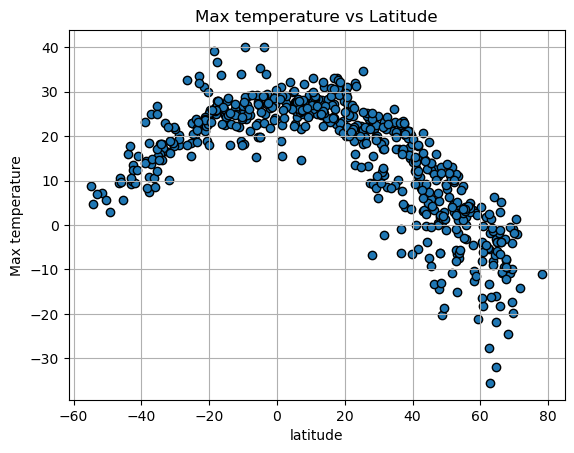

In [27]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat,temp, edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel('latitude')
plt.ylabel('Max temperature')
plt.title('Max temperature vs Latitude')
plt.grid(visible = True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

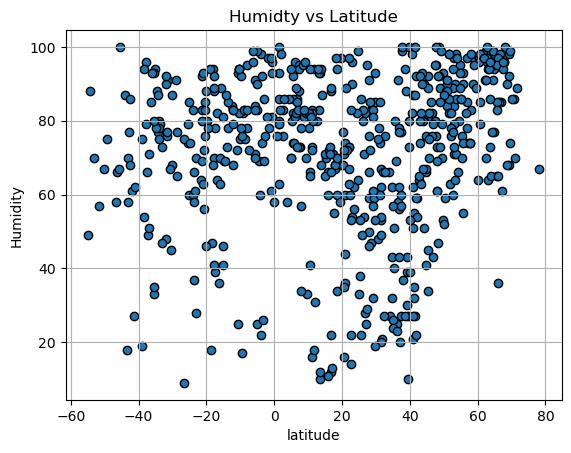

In [29]:
lat = city_data_df['Lat']
Humidty = city_data_df['Humidity']
plt.scatter(lat,Humidty, edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel('latitude')
plt.ylabel('Humidity')
plt.title('Humidty vs Latitude')
plt.grid(visible = True)
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

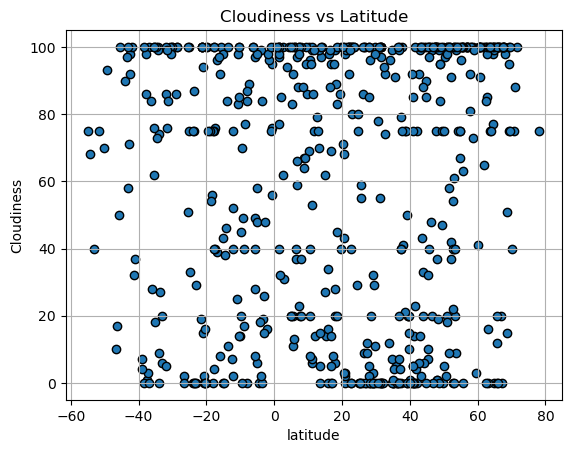

In [30]:
lat = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(lat,cloudiness, edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude')
plt.grid(visible = True)


plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

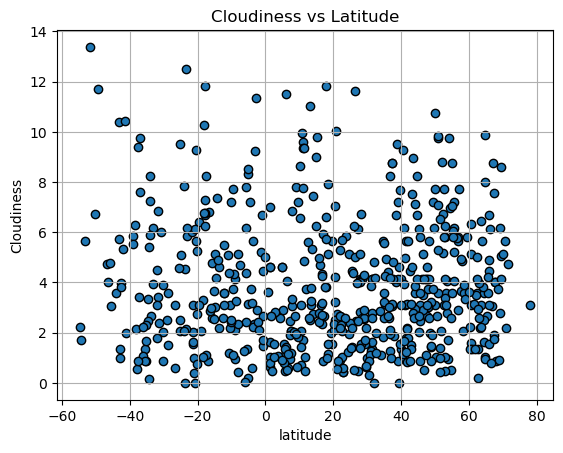

In [31]:
lat = city_data_df['Lat']
windspeed = city_data_df['Wind Speed']
plt.scatter(lat,windspeed, edgecolors = "black")
# Incorporate the other graph properties
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude')
plt.grid(visible = True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def weather_linregress(x,y,xlabel, ylabel):
    slope, intercept, r_value,p_value,stderr = linregress(x,y)
    lin_reg = slope * x + intercept
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, edgecolors = "black", c = 'Blue')
    plt.plot(x, lin_reg, color='red')
    

    
    formula_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.2,0.1, formula_text, transform=plt.gca().transAxes, fontsize=15, ha='center', color = "Red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    print(f"the r value is {r_value}")
    

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,32.01,54,80,0.45,MX,1699991945
1,lionel town,17.8101,-77.2406,32.94,68,99,6.62,JM,1699992026
3,isabela,6.7085,121.9711,26.11,86,59,0.61,PH,1699992026
4,matoury,4.8483,-52.3317,29.98,70,20,4.63,GF,1699992027
5,thompson,55.7435,-97.8558,0.09,93,100,6.17,CA,1699991961


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,9.29,70,58,1.37,AU,1699992026
8,port-aux-francais,-49.3500,70.2167,2.98,75,93,11.72,TF,1699992029
10,coruripe,-10.1256,-36.1756,26.77,75,14,7.21,BR,1699992029
11,hermanus,-34.4187,19.2345,18.17,77,100,5.42,ZA,1699992031
12,broken hill,-31.9500,141.4333,16.31,48,86,4.51,AU,1699991954


###  Temperature vs. Latitude Linear Regression Plot

the r value is -0.8523995624786825


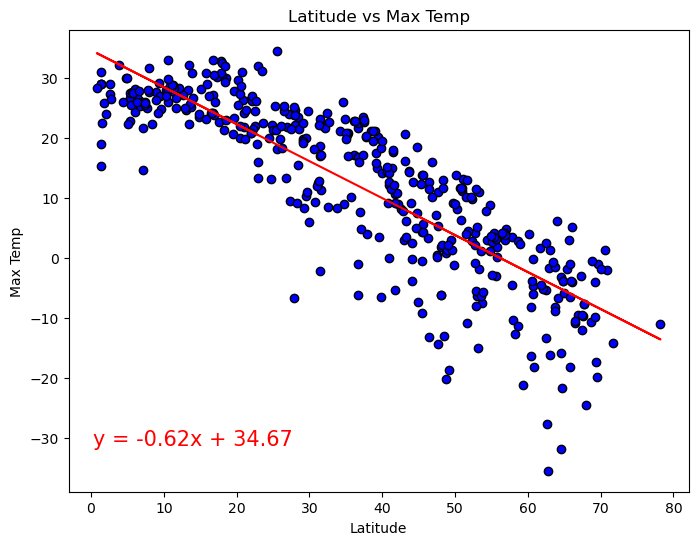

In [35]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_temp = northern_hemi_df['Max Temp']
northern_regress = weather_linregress(northern_lat,northern_temp,"Latitude", "Max Temp")





the r value is 0.7493213161909243


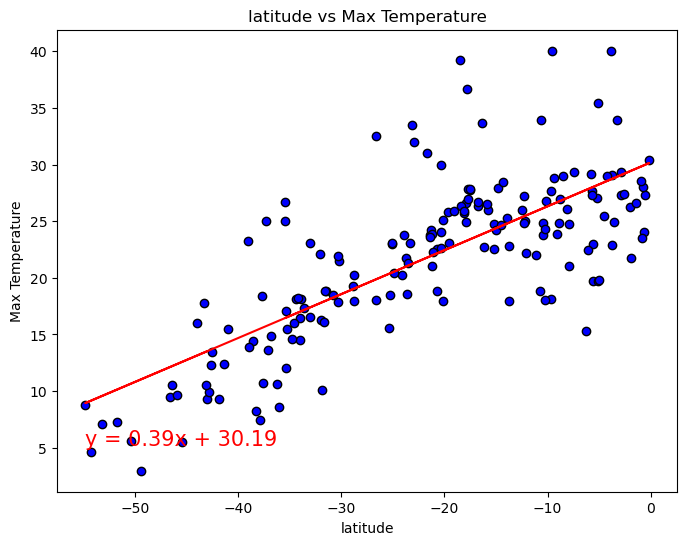

In [36]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_temp = southern_hemi_df['Max Temp']
southern_regress = weather_linregress(southern_lat,southern_temp, "latitude", "Max Temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r value is 0.2314197359754875


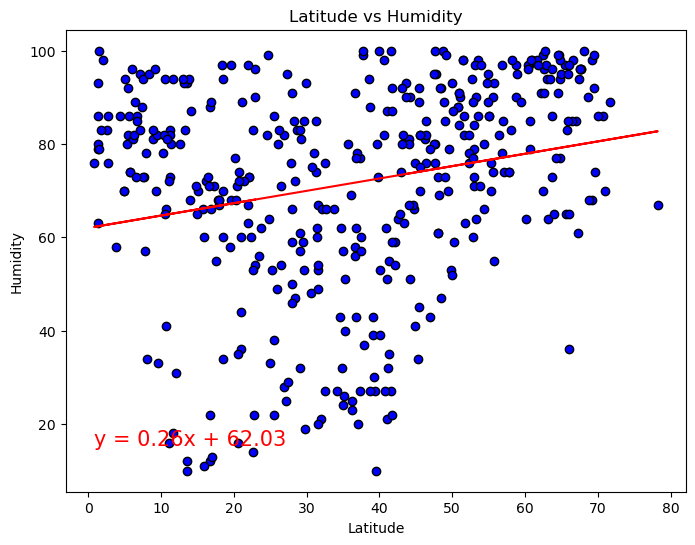

In [37]:
# Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_hum = northern_hemi_df['Humidity']
northern_regress = weather_linregress(northern_lat,northern_hum,"Latitude", "Humidity")

the r value is 0.1543467198289162


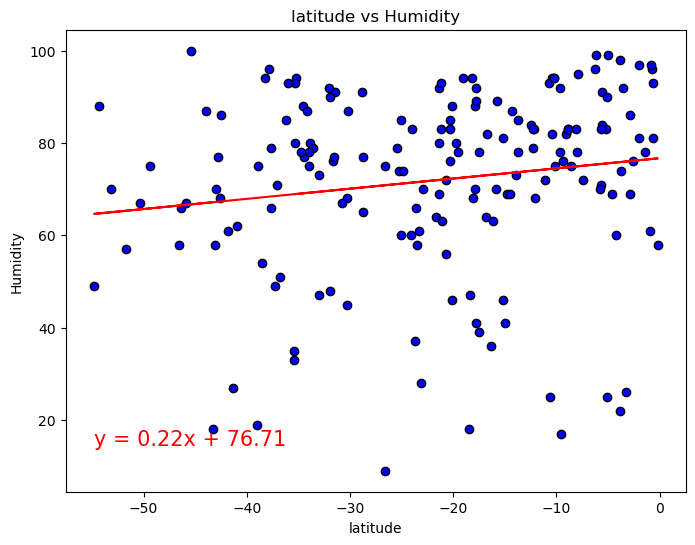

In [18]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_hum = southern_hemi_df['Humidity']
southern_regress = weather_linregress(southern_lat,southern_hum, "latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r value is 0.09614187707113736


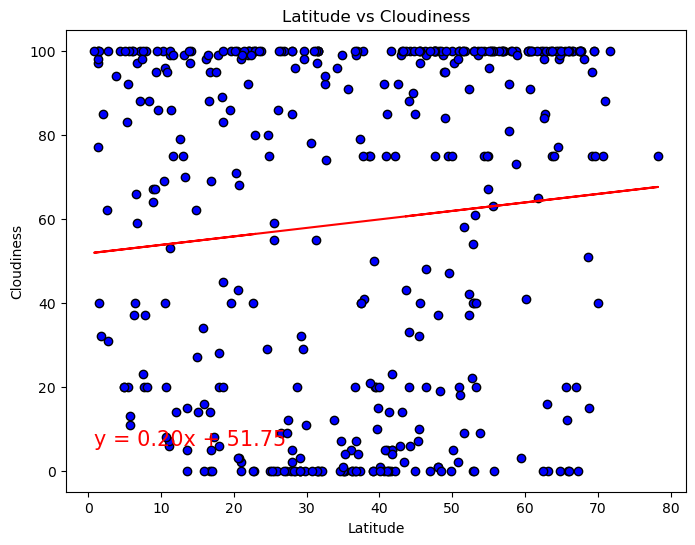

In [38]:
# Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_cloud = northern_hemi_df['Cloudiness']
northern_regress = weather_linregress(northern_lat,northern_cloud,"Latitude", "Cloudiness")

the r value is -0.08707387243189624


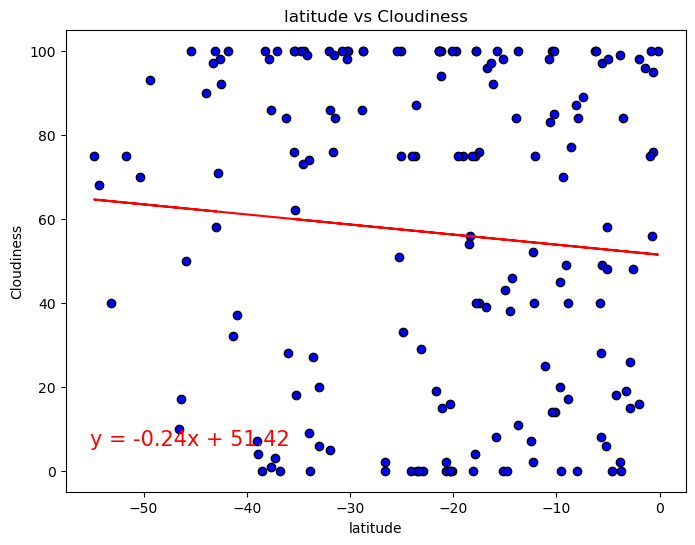

In [39]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_cloud = southern_hemi_df['Cloudiness']
southern_regress = weather_linregress(southern_lat,southern_cloud, "latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r value is 0.10662591740260642


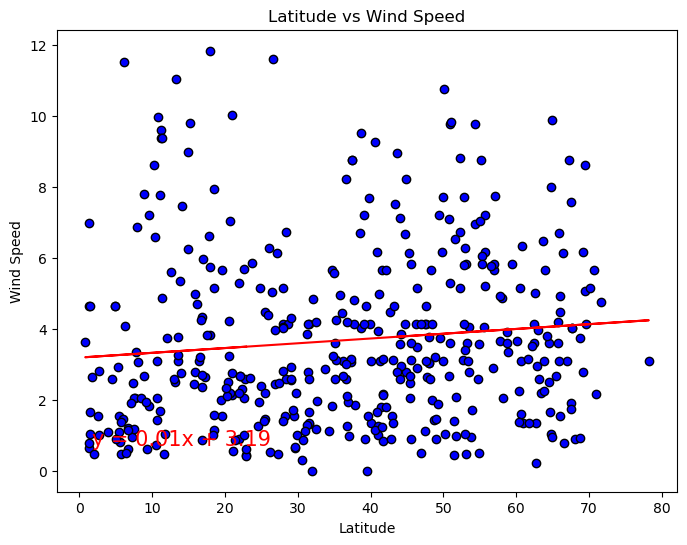

In [40]:
# Northern Hemisphere
northern_lat = northern_hemi_df['Lat']
northern_wind = northern_hemi_df['Wind Speed']
northern_regress = weather_linregress(northern_lat,northern_wind,"Latitude", "Wind Speed")

the r value is -0.0874855851541094


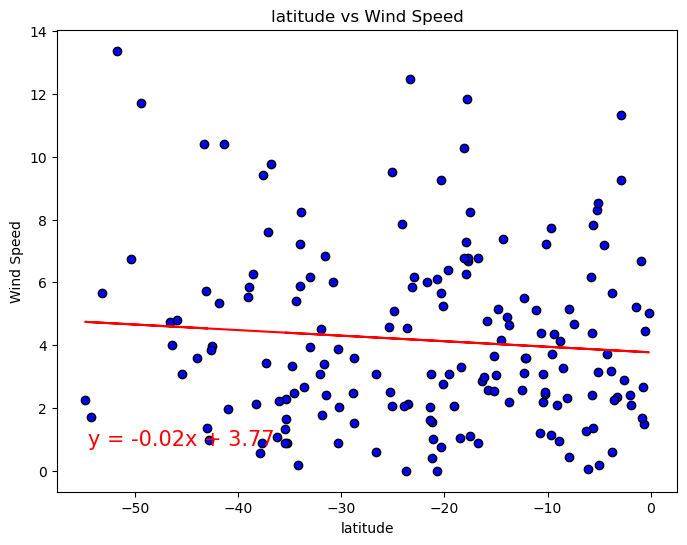

In [41]:
# Southern Hemisphere
southern_lat = southern_hemi_df['Lat']
southern_wind = southern_hemi_df['Wind Speed']
southern_regress = weather_linregress(southern_lat,southern_wind, "latitude", "Wind Speed")

**Discussion about the linear relationship:** There really only seems to be a strong corelation between latitutde and the other statitics that is temperature. everything else seems to be negligable. 